## Лабораторная работа 2
### Визуализация данных
### Выполнил: 6131-010302D, Пчелкина Юлия Жиганшевна

####  0 Загружаем в pandas любой набор данных

в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

Моллюск (морское ушко)

Возраст морского ушка определяют, разрезая раковину через конус, окрашивая ее и подсчитывая количество колец под микроскопом.

Для предсказания возраста используются и другие измерения (которые легче получить). 

In [3]:
df = pd.read_csv('abalone.csv', sep=',')

In [4]:
df

Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0      M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1      M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2      F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3      M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4      I   0.330     0.255   0.080       0.2050         0.0895         0.0395   
...   ..     ...       ...     ...          ...            ...            ...   
4172   F   0.565     0.450   0.165       0.8870         0.3700         0.2390   
4173   M   0.590     0.440   0.135       0.9660         0.4390         0.2145   
4174   M   0.600     0.475   0.205       1.1760         0.5255         0.2875   
4175   F   0.625     0.485   0.150       1.0945         0.5310         0.2610   
4176   M   0.710     0.555   0.195       1.9485         0.9455         0.3765   

      ShellWeight  Rings  
0          0.1500     15  
1          0.0700      7  
2          0.2100      9  
3          0.1550     10  
4          0.0550      7  
...           ...    ...  
4172       0.2490     11  
4173       0.2605     10  
4174       0.3080      9  
4175       0.2960     10  
4176       0.4950     12  

[4177 rows x 9 columns]

Столбцы:

- Sex - Пол (мужской, женский, ребенок). Категориальный признак.

- Length - Длина (самое длинный замер раковины). Вещественный тип.

- Diameter - Диаметр (замеряется перпендикулярно длине). Вещественный тип.

- Height - Высота (моллюск с панцирем). Вещественный тип.

- WholeWeight - Полный вес. Вещественный тип.

- ShuckedWeight - Вес моллюска (без раковины). Вещественный тип.

- VisceraWeight - Вес внутренностей моллюска (после "кровотечения"). Вещественный тип.

- ShellWeight - Вес корпуса (после сушки). Вещественный тип.

- Rings - Кольца (дает возраст в годах). Целочисленный тип.

#### 1 Matplotlib
Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. 

Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

##### 1.1. Построить любой график (любого рода) с помощью чистого matplotlib / pylab

добавим столбец "применый возраст по кольцам"

Пусть категория возрастов от 1 до 10 условных единиц

In [6]:
# найдем максимальное количество колец

df['Rings'].max()

29

In [7]:
df['Age'] = df.apply(lambda row: round(row['Rings']/3), axis = 1)
df.head(3)

Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   

   ShellWeight  Rings  Age  
0         0.15     15    5  
1         0.07      7    2  
2         0.21      9    3

Найдем зависимость диаметра раковины от возраста

In [8]:
X = np.transpose([df['Age'].values, df['Diameter'].values])

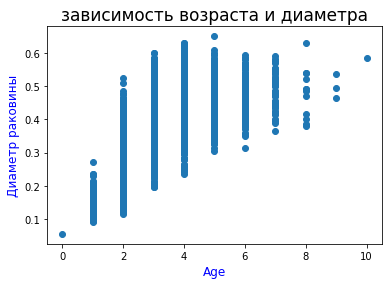

In [9]:
# заголовок
plt.title('зависимость возраста и диаметра', fontsize=17)

plt.xlabel('Age', fontsize=12, color='blue')
plt.ylabel('Диаметр раковины', fontsize=12, color='blue')

# точечный график
plt.scatter(X[:,0], X[:,1])

(array([1.000e+00, 7.300e+01, 7.650e+02, 1.891e+03, 9.570e+02, 2.960e+02,
        1.320e+02, 4.600e+01, 1.200e+01, 4.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

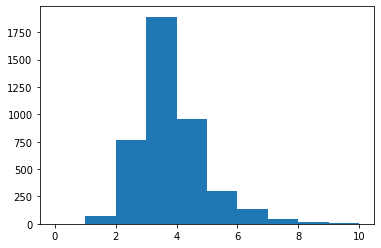

In [10]:
# гистограмма возраста
plt.hist(df['Age'])

Найдем зависимость длины раковины от возраста

##### 1.2. Построить несколько суб-графиков на одном графике используя .subplot

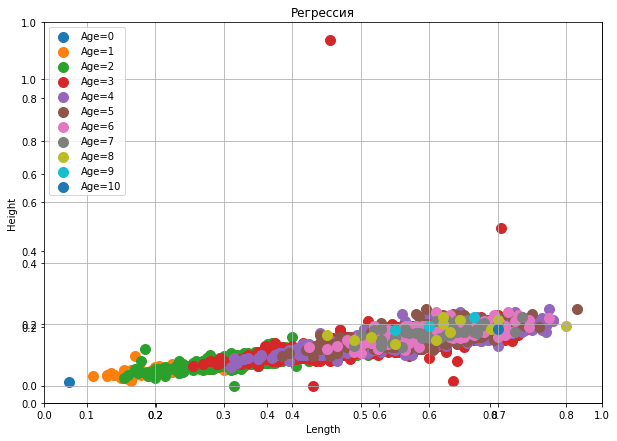

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))  
ax = plt.axes()        
legend = []
plt.title('Регрессия')
x_lable='Length'
y_lable='Height'
ax.set_xlabel(x_lable)             
ax.set_ylabel(y_lable)  
for c, rows in df.groupby('Age'):
    plt.scatter(rows[x_lable], rows[y_lable], s = 100)
    legend.append("Age=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

(array([1.023e+03, 3.129e+03, 2.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.113, 0.226, 0.339, 0.452, 0.565, 0.678, 0.791, 0.904,
        1.017, 1.13 ]),
 <BarContainer object of 10 artists>)

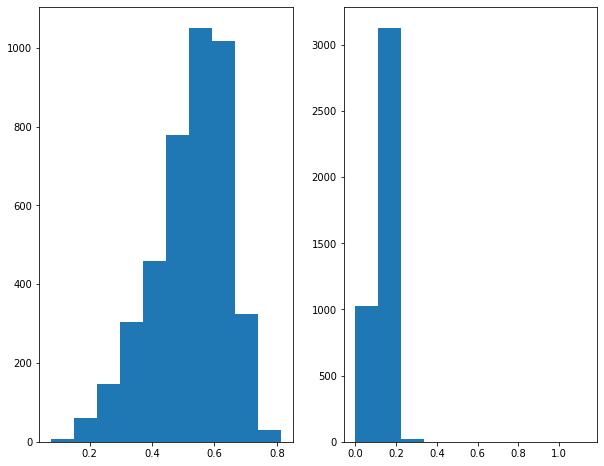

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.hist(df['Length'])
ax2.hist(df['Height'])


#### 2 Построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot 

Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). 

Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

In [13]:
# в копии датасета удатяем нечисловой столбец
df1 = df.copy()
del df1['Sex']

In [14]:
df1.head()

Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  Age  
0        0.150     15    5  
1        0.070      7    2  
2        0.210      9    3  
3        0.155     10    3  
4        0.055      7    2

<AxesSubplot:>

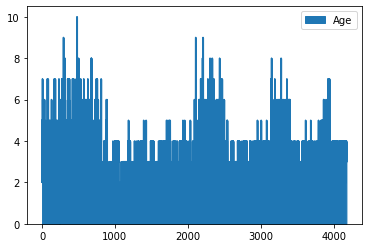

In [15]:
df1.plot(y='Age', kind='area')

<AxesSubplot:ylabel='Density'>

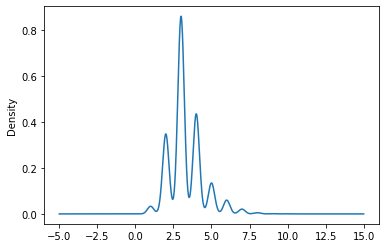

In [16]:
df1['Age'].plot.kde(y='Age')


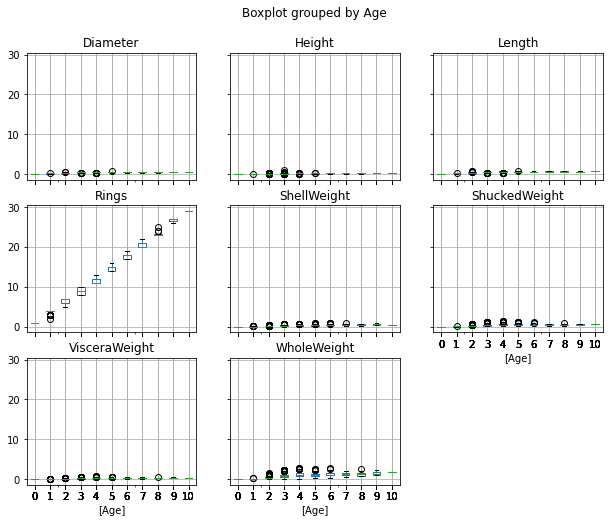

In [17]:
boxplot = df.boxplot(by='Age', figsize=(10, 8))

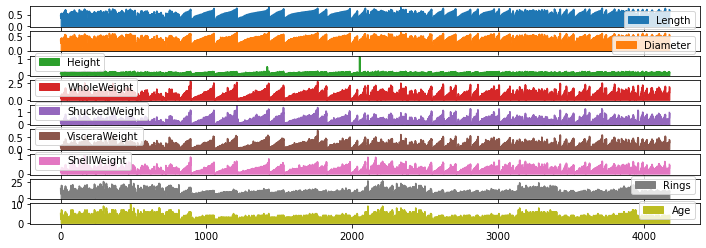

In [18]:
axs = df1.plot.area(figsize=(12, 4), subplots=True)

<AxesSubplot:>

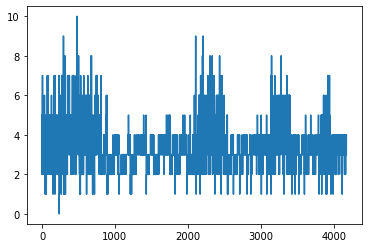

In [19]:
df1['Age'].plot()

In [20]:
# работа с объектами Series
age = df['Age']
type(age)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

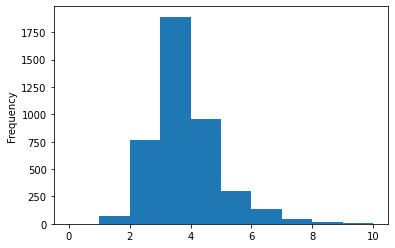

In [21]:
age.plot(kind = 'hist')

#### 3 Seaborn 

##### 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

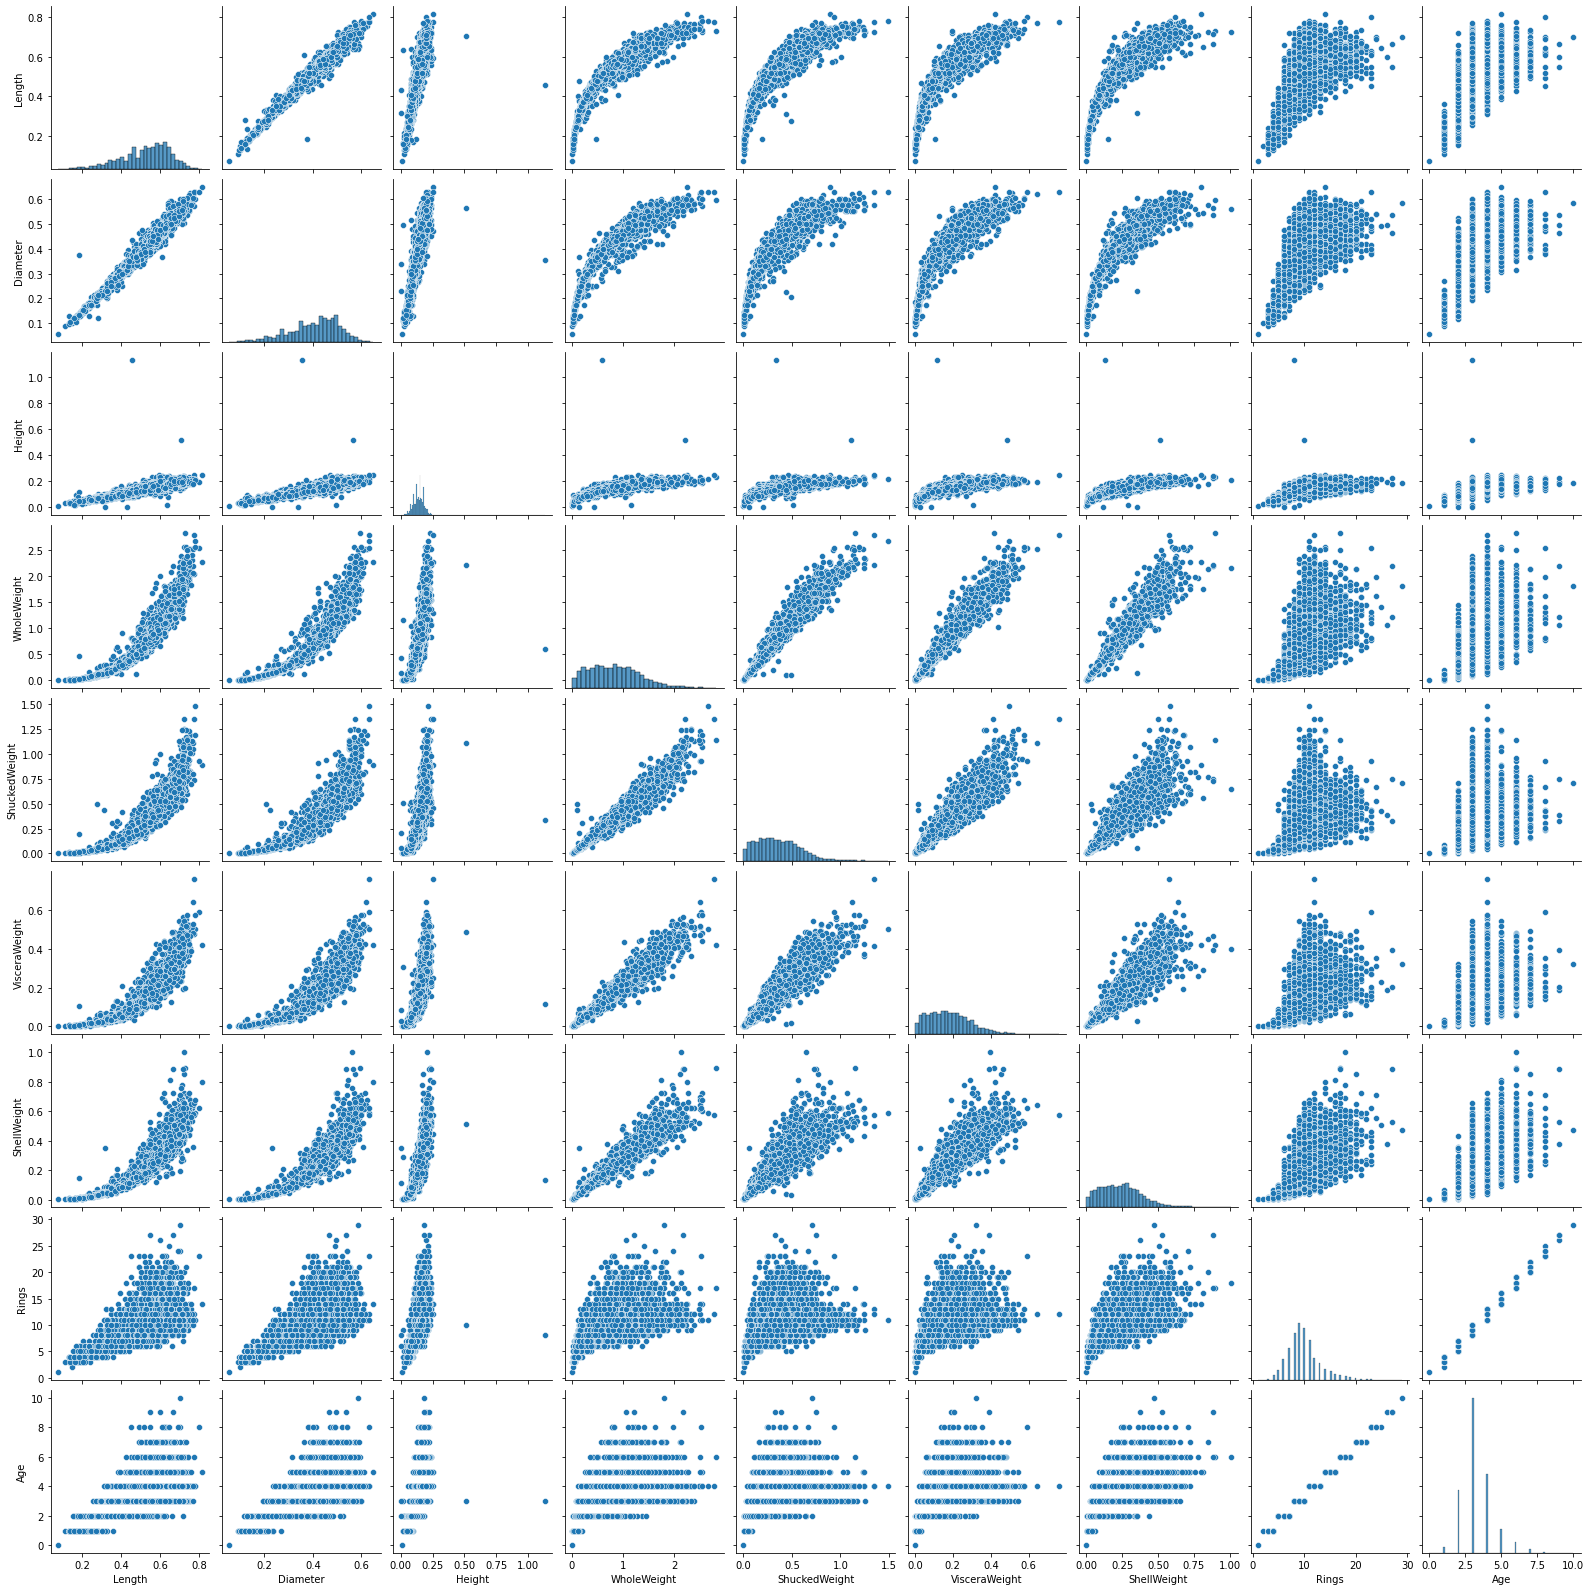

In [22]:
sns.pairplot(df1)

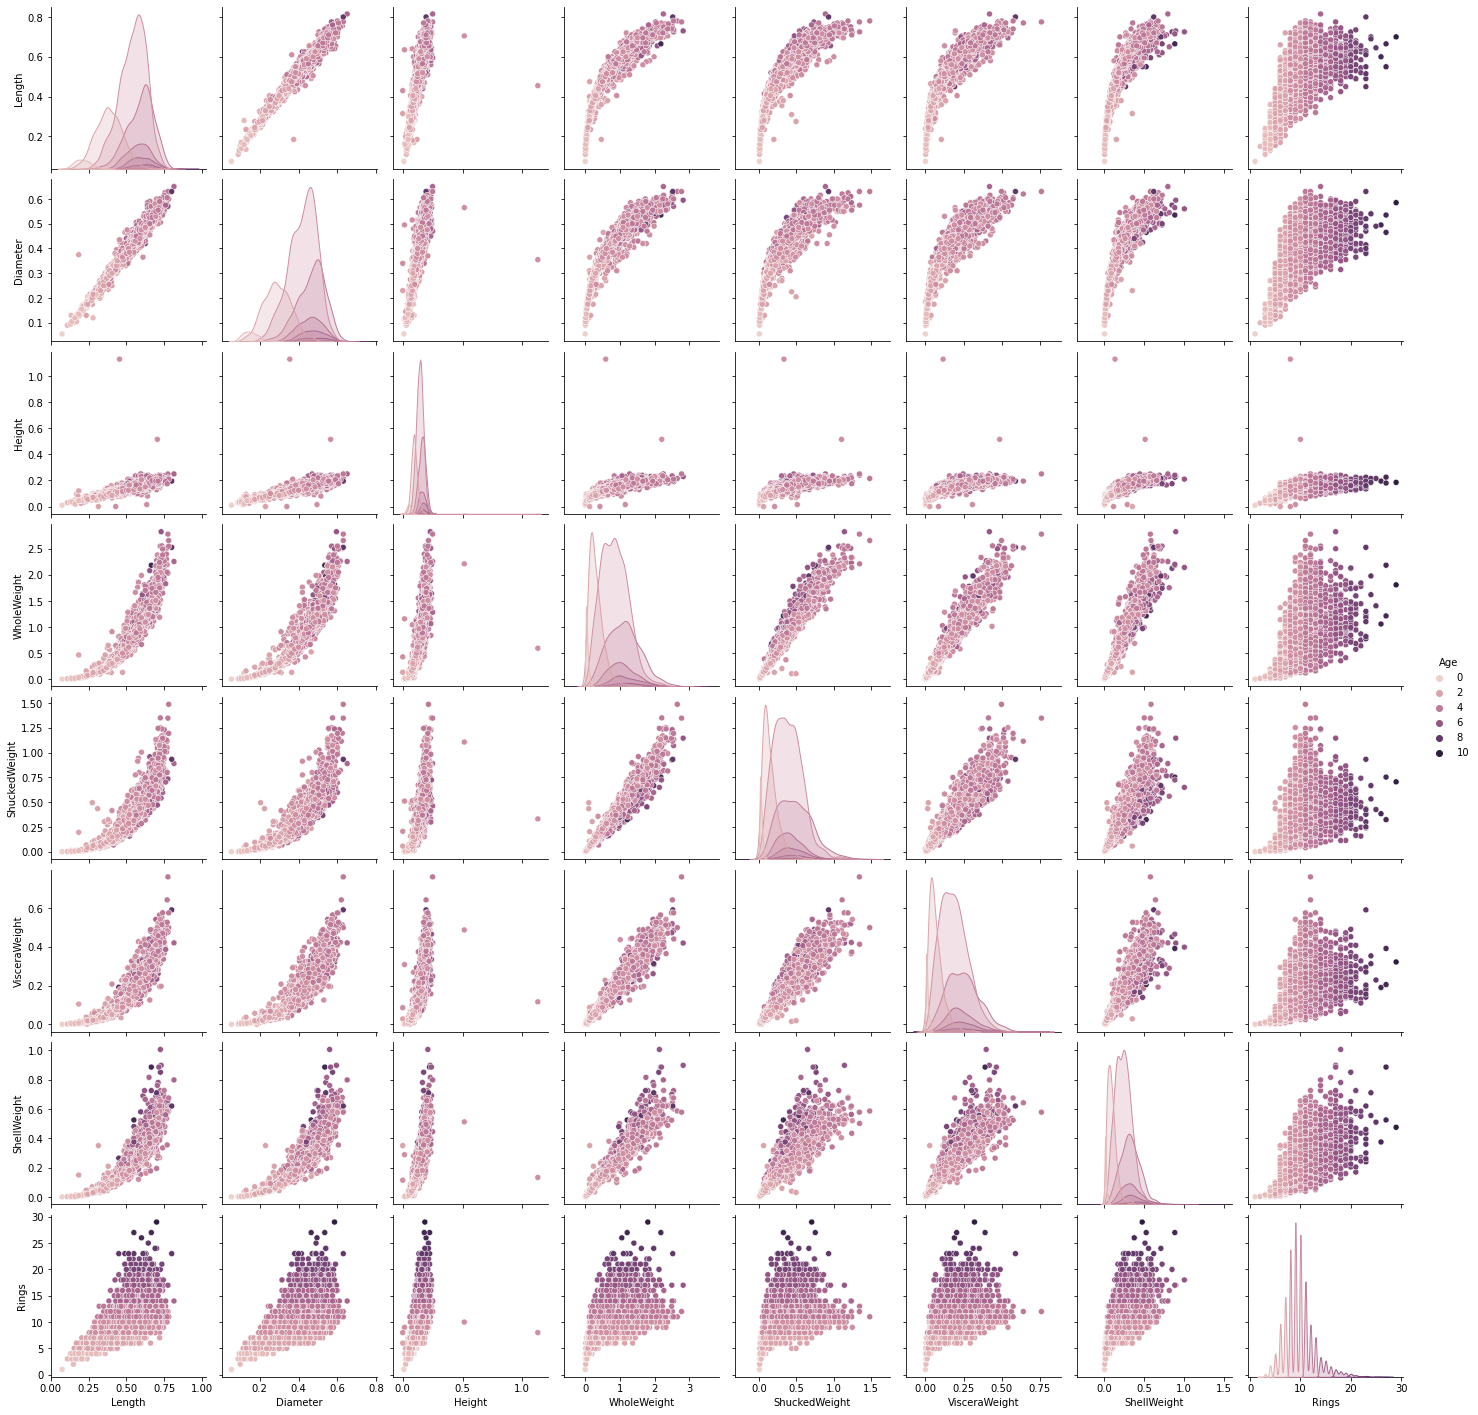

In [23]:
sns.pairplot(df1, hue="Age")

<AxesSubplot:xlabel='Length', ylabel='count'>

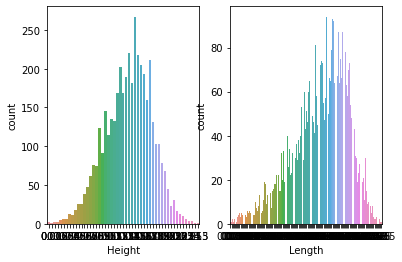

In [24]:
plt.subplot(1, 2, 1)
sns.countplot(x ='Height', data = df)

plt.subplot(1, 2, 2)
sns.countplot(x ='Length', data = df)

<AxesSubplot:xlabel='Rings', ylabel='Age'>

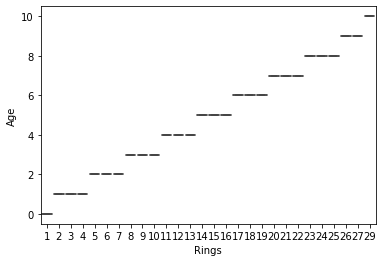

In [25]:
sns.boxplot(x="Rings", y="Age", data=df1)

<AxesSubplot:xlabel='Rings', ylabel='Age'>

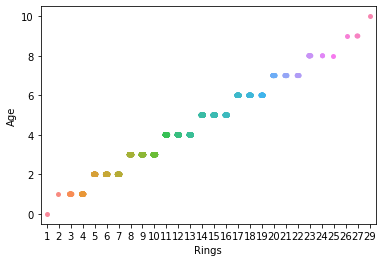

In [26]:
sns.stripplot(x="Rings", y="Age", data=df1)

##### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

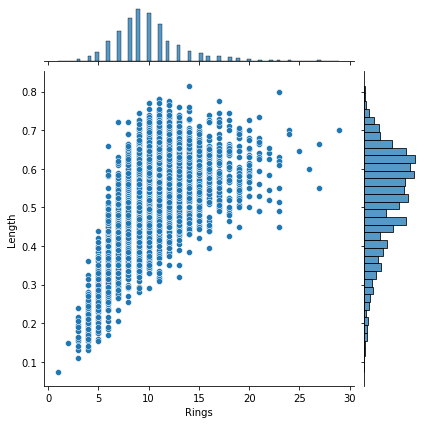

In [27]:
sns.jointplot(x='Rings', y='Length', data=df)

##### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<AxesSubplot:xlabel='Height', ylabel='Length'>

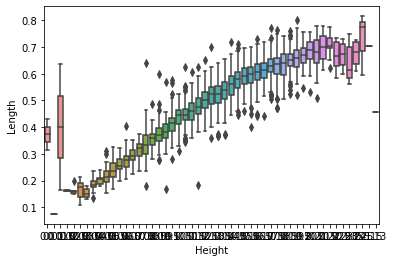

In [28]:
sns.boxplot(x="Height", y="Length", data=df1)

<AxesSubplot:xlabel='Height', ylabel='Length'>

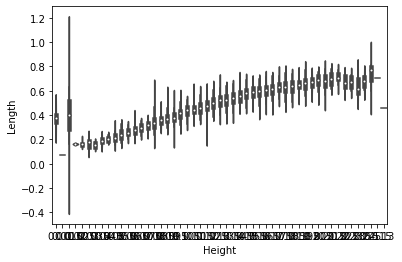

In [29]:
sns.violinplot(x="Height", y="Length", data=df1)

##### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<AxesSubplot:>

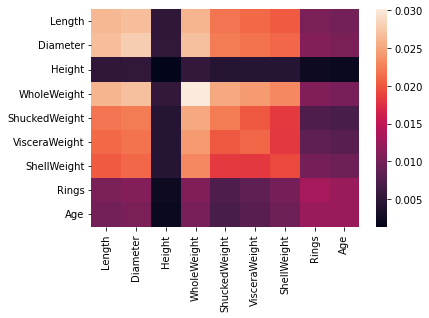

In [30]:
sns.heatmap(df1.apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

#### 4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [31]:
from scipy.stats import probplot

((array([-3.58906977, -3.35088698, -3.21946454, ...,  3.21946454,
          3.35088698,  3.58906977]),
  array([0.055, 0.09 , 0.095, ..., 0.63 , 0.63 , 0.65 ])),
 (0.09783880001293291, 0.40788125448886764, 0.9852273874515621))

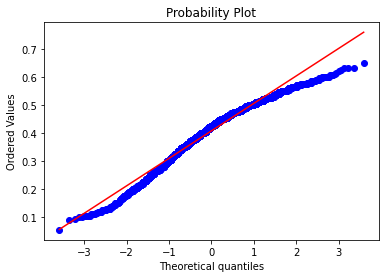

In [32]:
probplot(df1['Diameter'], dist="norm", plot=plt)

#### Построить любой график (связанный с вашими данными) с помощью plotly

In [33]:
# pip install plotly

In [34]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [35]:
df2 = df1.sort_values(by = 'Age')

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df2['Age'], y = df2['Rings']))
fig.show()